### Modeling Data Preparation

> <sub>⚠️ **Note**: Internal links (like Table of Contents) work best when this notebook is opened in **Jupyter Notebook** or **nbviewer.org**.<br>
> GitHub does **not support scrolling to sections** inside `.ipynb` files.</sub>

---
######  - [Reading March Madness Dataset](#Reading-March-Madness-Dataset)
######  - [Building the modeling data](#Building-the-modeling-data)
######  - [Principal Component Analysis](#Principal-Component-Analysis)
######  - [Adding PCA columns to dataset](#Adding-PCA-columns-to-dataset)
######  - [Writing the dataset](#Writing-the-dataset)
---

#### Reading March Madness Dataset
######  - [_Click here to move back to index_](#Modeling-Data-Preparation)

In [5]:
import sys
sys.path.append('src') 


In [6]:
from Data_Preprocessing import load_data

mm_data = load_data('data/processed/mm_data.csv')
macro_data = load_data('data/raw/Macro_Dataset.csv')


#### Building the modeling data
######  - [_Click here to move back to index_](#Modeling-Data-Preparation)

In [8]:
from ML_Utilities import build_model_input

mm_modeling = build_model_input(mm_data, macro_data) 

#### Principal Component Analysis
######  - [_Click here to move back to index_](#Modeling-Data-Preparation)

Dropped low variance columns: ['TurnoverMargin', 'team2_FTR', 'team1_FTR']


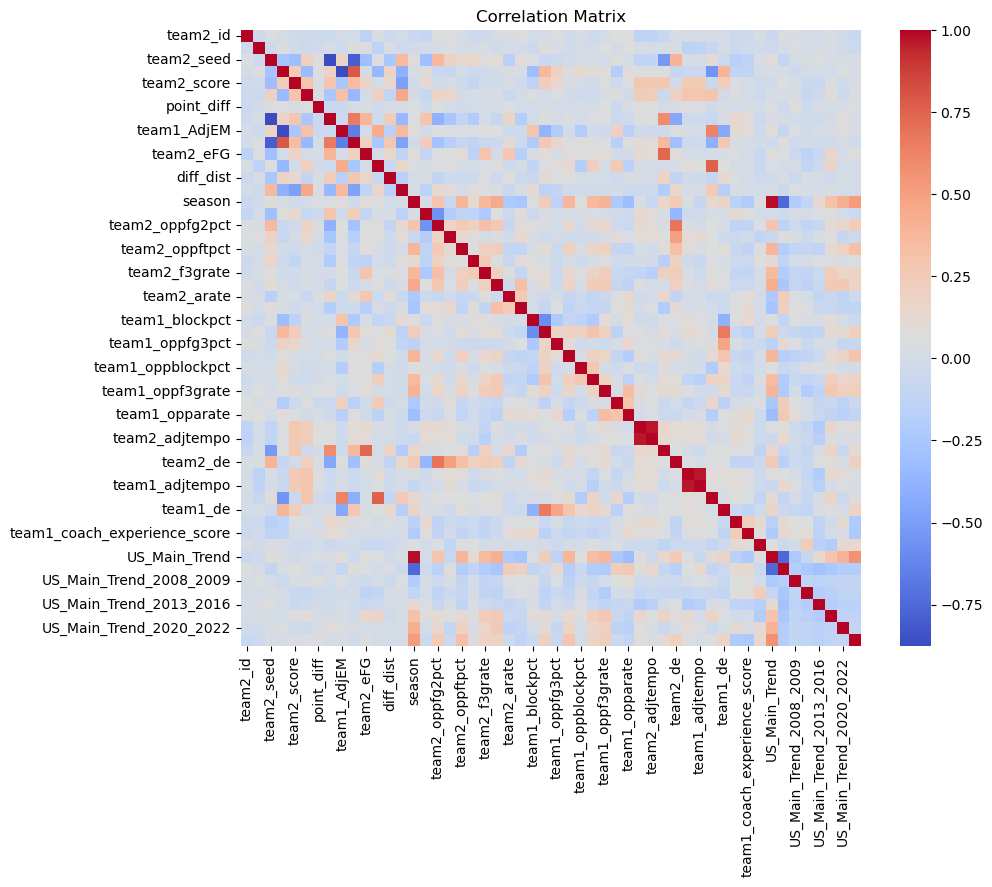

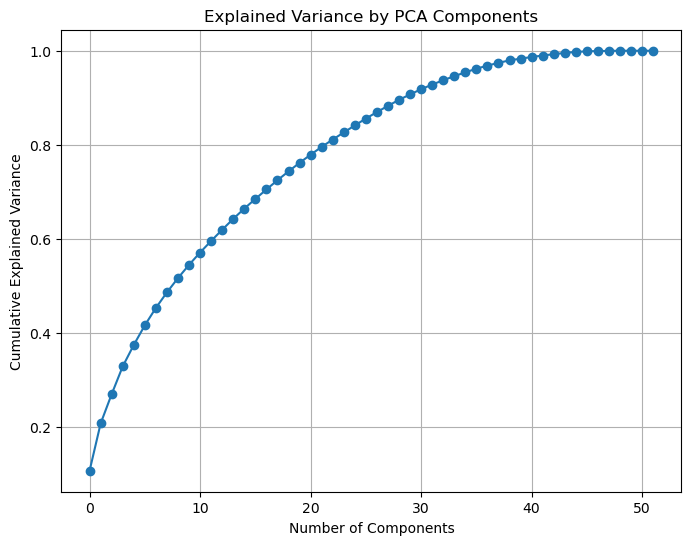


Top variable contributions to PC1:
SeedDiff       0.291353
team2_AdjEM    0.221458
team1_seed     0.204198
Name: PC1, dtype: float64

Top variable contributions to PC2:
season           0.285195
US_Main_Trend    0.282834
SeedDiff         0.263925
Name: PC2, dtype: float64

Top variable contributions to PC3:
team1_oe       0.273547
team2_oe       0.272526
team2_tempo    0.271160
Name: PC3, dtype: float64

Top variable contributions to PC4:
team1_adjtempo    0.255775
team1_tempo       0.243522
team1_de          0.238624
Name: PC4, dtype: float64

Recommended variables based on PCA analysis:
PC1: ['SeedDiff', 'US_Main_Trend', 'season']
PC2: ['season', 'US_Main_Trend', 'SeedDiff']
PC3: ['team1_oe', 'team2_oe', 'team2_tempo']
PC4: ['team1_adjtempo', 'team2_AdjEM', 'team1_tempo']


{'PC1': ['SeedDiff', 'US_Main_Trend', 'season'],
 'PC2': ['season', 'US_Main_Trend', 'SeedDiff'],
 'PC3': ['team1_oe', 'team2_oe', 'team2_tempo'],
 'PC4': ['team1_adjtempo', 'team2_AdjEM', 'team1_tempo']}

In [10]:
from ML_Utilities import perform_pca_analysis

important_variables = perform_pca_analysis(mm_modeling, top_n=3)

important_variables


#### Adding PCA columns to dataset
######  - [_Click here to move back to index_](#Modeling-Data-Preparation)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define PCA blocks
pca_configs = [
    {
        'features': ['SeedDiff', 'team2_seed', 'team1_seed'],
        'component_name': 'PC1'
    },
    {
        'features': ['season', 'team2_oppfg2pct', 'team1_oppfg2pct'],
        'component_name': 'PC2'
    },
    {
        'features': ['team2_oe', 'team1_oe', 'team1_AdjEM'],
        'component_name': 'PC3'
    },
    {
        'features': ['team1_adjtempo', 'team1_tempo', 'team2_adjtempo'],
        'component_name': 'PC4'
    }
]

mm_modeling['year'] = mm_modeling['season'] 

# Apply PCA per block
for config in pca_configs:
    features = config['features']
    name = config['component_name']

    # Standardize
    scaler = StandardScaler()
    scaled = scaler.fit_transform(mm_modeling[features])

    # Apply PCA
    pca = PCA(n_components=1)
    reduced = pca.fit_transform(scaled)

    # Add new PCA feature
    mm_modeling[name] = reduced

    # Drop original columns
    mm_modeling.drop(columns=features, inplace=True)

    # Print explained variance
    print(f"\nExplained variance by {name} component:", pca.explained_variance_ratio_)



Explained variance by PC1 component: [0.75639451]

Explained variance by PC2 component: [0.46649153]

Explained variance by PC3 component: [0.54336797]

Explained variance by PC4 component: [0.66080891]


#### Writing the dataset
######  - [_Click here to move back to index_](#Modeling-Data-Preparation)

In [14]:
from Data_Preprocessing import write_data

# Save to processed
write_data(mm_modeling, 'mm_modeling.csv')

Data written to: C:\Users\utkar\Desktop\PyCharm Projects Spring\Deloitte March Crunch Data Madness\data\processed\mm_modeling.csv


'data\\processed\\mm_modeling.csv'